In [16]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pylab as pb
import pandas as pd
import GPy

In [89]:
df = pd.read_csv('fulldf.csv',encoding = 'unicode_escape') # getting full data set 
sparse_df = df[['_chemical_formula_weight']] # only considering one feature
# ,'_space_group_IT_number', '_symmetry_cell_setting','num_atoms'

bg_avg = np.mean(df['bandgaps']) # band gap mean
df['bandgaps'] = df['bandgaps'].subtract(bg_avg) # shifting band gaps

X = sparse_df[:5000] 
Y = df['bandgaps'][:5000]


In [90]:
y = Y.values.tolist()
s = [[i] for i in y]
Y = np.array(s)

In [92]:
print(X.shape, Y.shape)

(5000, 1) (5000, 1)


In [93]:
kernel = GPy.kern.RBF(input_dim=1, variance=1., lengthscale=1.) # using RBF kernel 
m = GPy.models.GPRegression(X,Y,kernel) 

In [94]:
from IPython.display import display
display(m)

GP_regression.,value,constraints,priors
rbf.variance,1.0,+ve,
rbf.lengthscale,1.0,+ve,
Gaussian_noise.variance,1.0,+ve,


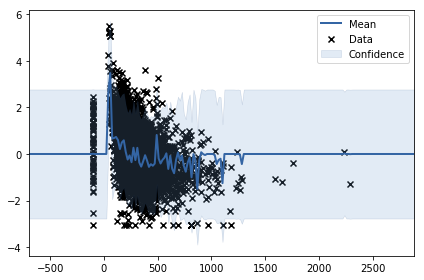

In [95]:
fig = m.plot()

In [98]:
m.optimize(messages=True)
#m.optimize_restarts(num_restarts = 10)

Running L-BFGS-B (Scipy implementation) Code:
  runtime   i      f              |g|        
    40s62  0002   7.769710e+03   3.729441e+06 
 03m03s19  0010   6.861046e+03   1.728867e+03 
 04m29s02  0017   6.773191e+03   2.617181e+03 
 05m57s87  0027   6.739467e+03   1.282500e+03 
 07m07s78  0035   6.738895e+03   3.050889e-08 
Runtime:  07m07s78
Optimization status: Converged



GP_regression.,value,constraints,priors
rbf.variance,1.2591800758907263,+ve,
rbf.lengthscale,66.69147421516628,+ve,
Gaussian_noise.variance,0.8519229623261868,+ve,


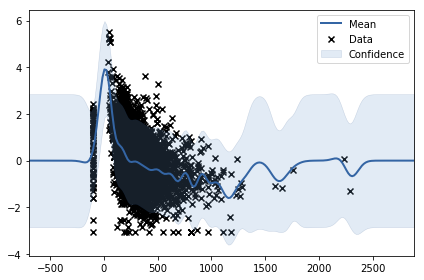

In [115]:
display(m)
#fig = m.plot(plot_density = True)
fig = m.plot()

In [110]:
x_test = X.values.tolist()
s_test = [i for i in x_test]
X_test = np.array(s_test)

In [135]:
# Xnew
X_new = sparse_df[11000:]
X_ = X_new.values.tolist()
temp = [i for i in X_]
X_newtest = np.array(temp)
X_newtest
mean, var = m.predict(X_newtest)

In [149]:
new_df = df[['bandgaps','_chemical_formula_weight','_space_group_IT_number', '_symmetry_cell_setting', '_symmetry_space_group_name_H-M',
         '_cell_angle_alpha', '_cell_angle_beta', '_cell_angle_gamma', '_diffrn_reflns_theta_full',
         '_diffrn_reflns_theta_max', '_diffrn_reflns_theta_min', '_exptl_absorpt_coefficient_mu',
         '_exptl_absorpt_correction_T_max', '_exptl_absorpt_correction_T_min', 'num_atoms']]
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
space_vals_temp = df['_symmetry_space_group_name_H-M']
new_df['_symmetry_space_group_name_H-M'] = space_vals_temp.astype(str)

label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(new_df['_symmetry_space_group_name_H-M'])
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
space_vals_encoded = onehot_encoder.fit_transform(integer_encoded)
new_df['_symmetry_space_group_name_H-M'] = integer_encoded

 /Users/michellevoong/anaconda2/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 /Users/michellevoong/anaconda2/envs/py37/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning:The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
 /Users/michellevoong/anaconda2/envs/py37/lib

In [151]:
X = new_df.drop(['bandgaps'], axis=1)[:5000]
Y = new_df['bandgaps'][:5000]

In [152]:
y = Y.values.tolist()
s = [[i] for i in y]
Y = np.array(s)

In [156]:
# define kernel
kernel = GPy.kern.RBF(input_dim=14, variance=1., lengthscale=1.) # using RBF kernel  

# create simple GP model
m = GPy.models.GPRegression(X,Y,kernel)

In [158]:
# optimize and plot
x_test_all = np.array([i for i in X[11000:].values.tolist()])
m.optimize(messages=True,max_f_eval = 1000)


Running L-BFGS-B (Scipy implementation) Code:
  runtime   i      f              |g|        
 01m45s27  0006   7.108277e+03   3.723083e+03 
 10m22s71  0019   6.972023e+03   9.560169e+03 
 14m42s64  0037   6.691475e+03   2.792534e-01 
 15m19s63  0041   6.691474e+03   1.923147e-06 
Runtime:  15m19s63
Optimization status: Converged



AssertionError: need at least column vectors as inputs to kernels for now, given X2.shape=(0,)

In [166]:
x_test_all = np.array([i for i in new_df.drop(['bandgaps'], axis=1)[11000:].values.tolist()])
mean_all, var_all = m.predict(x_test_all)

In [167]:
print(mean_all, var_all)

[[ 0.71806693]
 [-0.04703381]
 [-0.17503676]
 ...
 [-0.54791358]
 [ 0.40599789]
 [ 0.06500642]] [[0.83026922]
 [0.83134787]
 [0.77116139]
 ...
 [0.77626027]
 [0.7700446 ]
 [0.79538554]]
